# EDA

## Import dataset + libraries

In [1]:
#TODO

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#linear algebra
import numpy as np

#data processing
import pandas as pd


#scaling methods
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data.isnull().sum() #checking for total null values#Detect missing values for an array-like object.

#This function takes a scalar or array-like object and indicates whether values are missing (NaN in numeric arrays, None or NaN in object arrays, NaT in datetimelike).

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
print(*data.columns,'\n', len(data.columns))


id date price bedrooms bathrooms sqft_living sqft_lot floors waterfront view condition grade sqft_above sqft_basement yr_built yr_renovated zipcode lat long sqft_living15 sqft_lot15 
 21


id - Уникальный ID для каждого дома  
date - Дата продажи дома  
price - Стоимость продажи дома  
bedrooms - Количество спален  
bathrooms - Количество ванных комнат (0.5 - туалет без душа)  
sqft_living - Квадратные метры жилой площади  
sqft_lot - Квадратные метры общей площади  
floors - Количество этажей  
waterfront - Наличие набережной или ее отсутствие  
view - Оценка от 0 до 4, насколько хороший вид  
condition - Оценка от 1 до 5, насколько хорошее состояние  
grade - Оценка от 1 до 13, где 1-3 - плохое качество конструкции и дизайна, 7 - среднее качество, 11-13 - высокое качество  
sqft_above - Квадратные метры дома, находящиеся над землей  
sqft_basement - Квадратные метры дома, находящиеся под землей  
yr_built - Год постройки дома  
yr_renovated - Год ремонта дома  
zipcode - Почтовый индекс  
lat - Широта  
long - Долгота  
sqft_living15 - Квадратные метры жилой площади для 15 ближайших соседей  
sqft_lot15 - Квадратные метры общей площади для 15 ближайших соседей  


In [6]:
#TODO посмотреть квартили процентили цены, порисовать графики распределения величин,
#(скорее всего бокс плотами чтобы увидеть медианы квартили и выбросы неадекватные) посмотреть и почистить данные от неинтерпретируемых признаков, 

In [7]:
cleaned_data = data.drop(["id","long","lat","zipcode", "date"],axis = 1)

In [8]:
cleaned_data.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,2390,7570


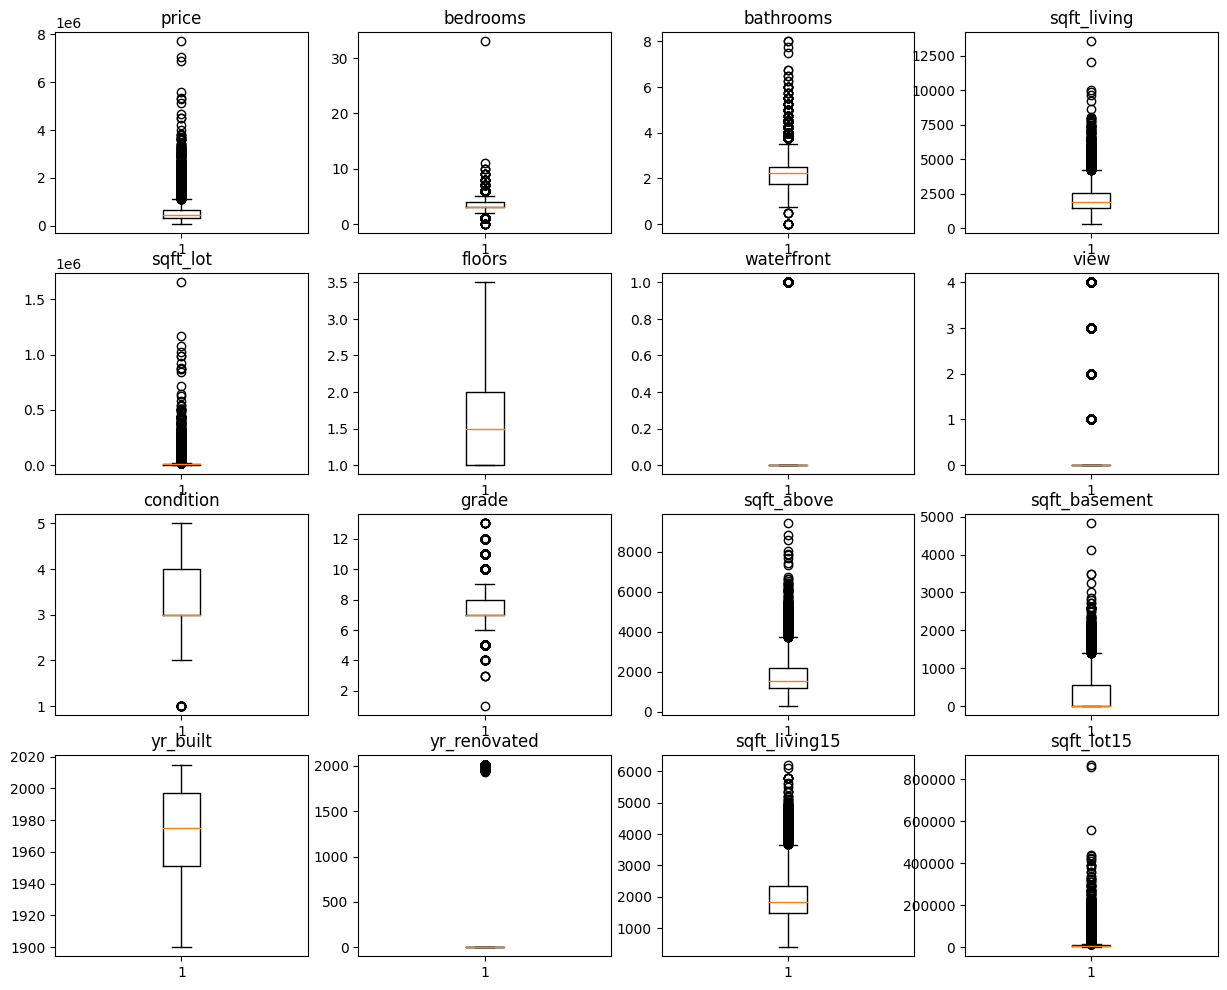

In [9]:
fig, axs = plt.subplots(4,4, figsize = (15,12))
axs = axs.ravel()

for i, column in enumerate(cleaned_data.columns):
    axs[i].boxplot(cleaned_data[column])
    axs[i].set_title(column)

надо будет почирикать и подумать какие штучки убрать а какие оставить тк супер тупо yr renovated выглядит

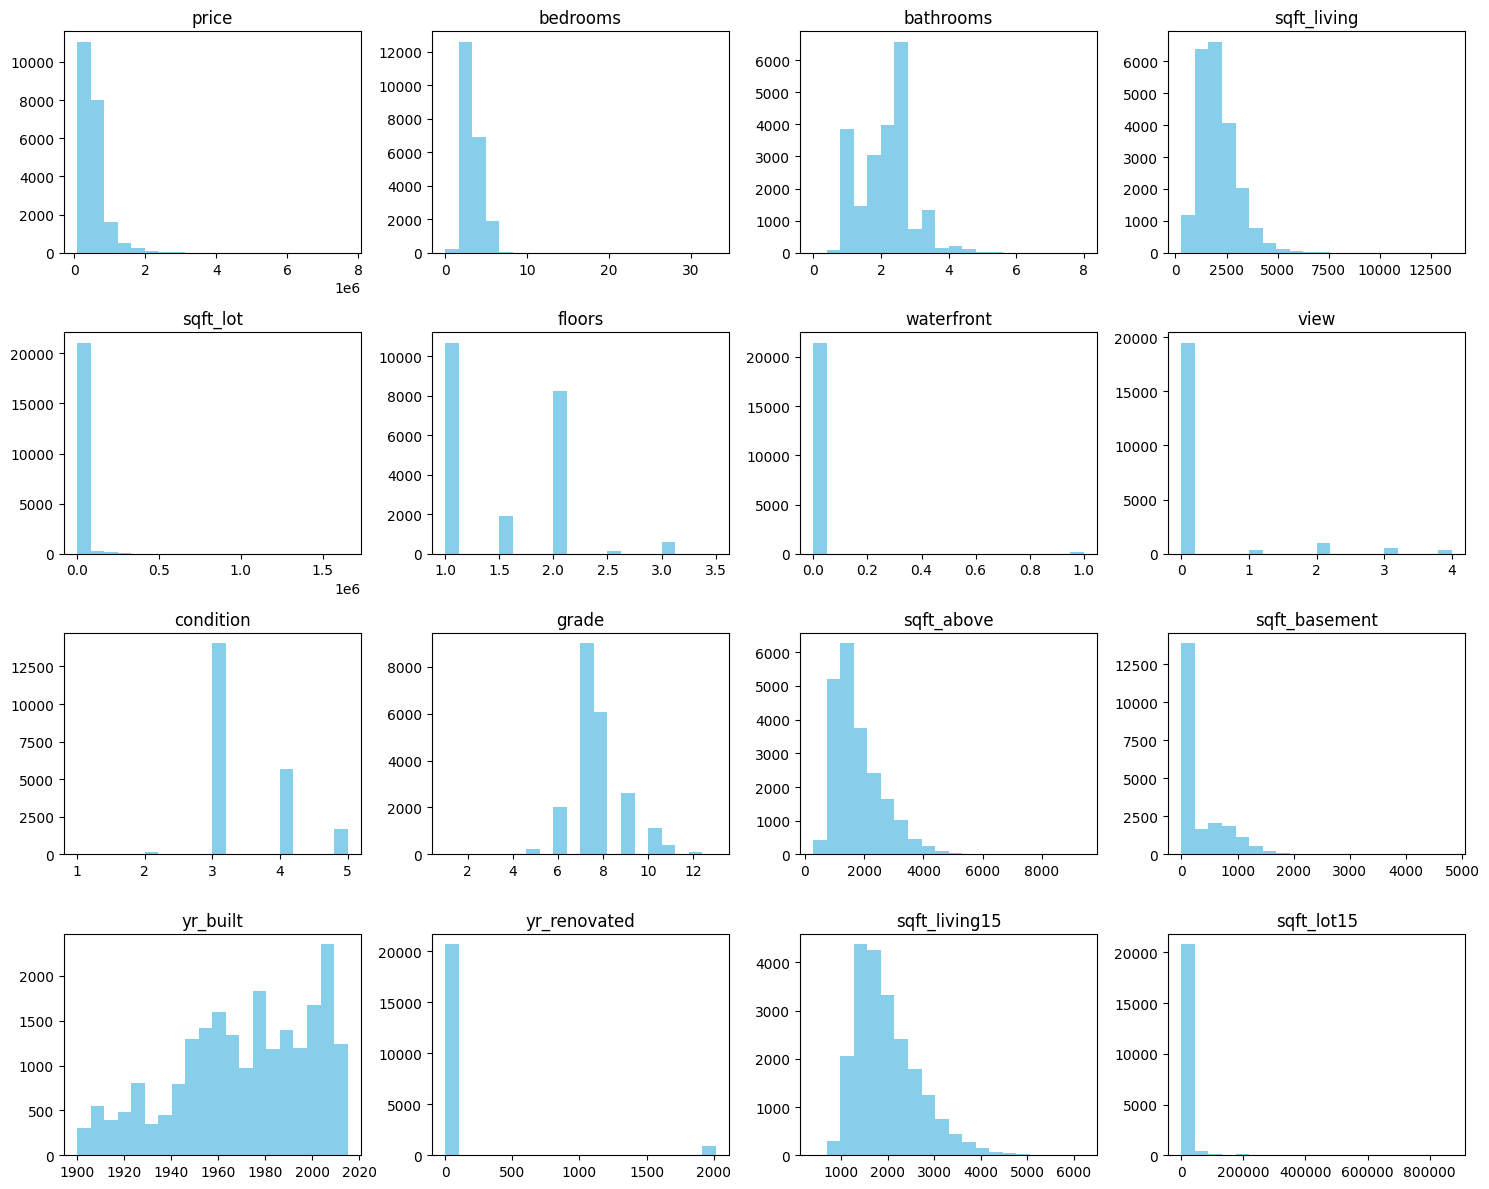

In [10]:
fig, axs = plt.subplots(4, 4, figsize=(15, 12))
axs = axs.ravel()


for i, column in enumerate(cleaned_data.columns):
    axs[i].hist(cleaned_data[column], bins=20, color='skyblue')
    axs[i].set_title(column)

plt.tight_layout()
plt.show()

In [11]:

features_to_log = ['sqft_living15', 'sqft_lot15', 'sqft_living', 'sqft_above']
logged_data = cleaned_data.copy()
# Прологарифмируем указанные признаки
logged_data[features_to_log] = np.log(logged_data[features_to_log]+1) 

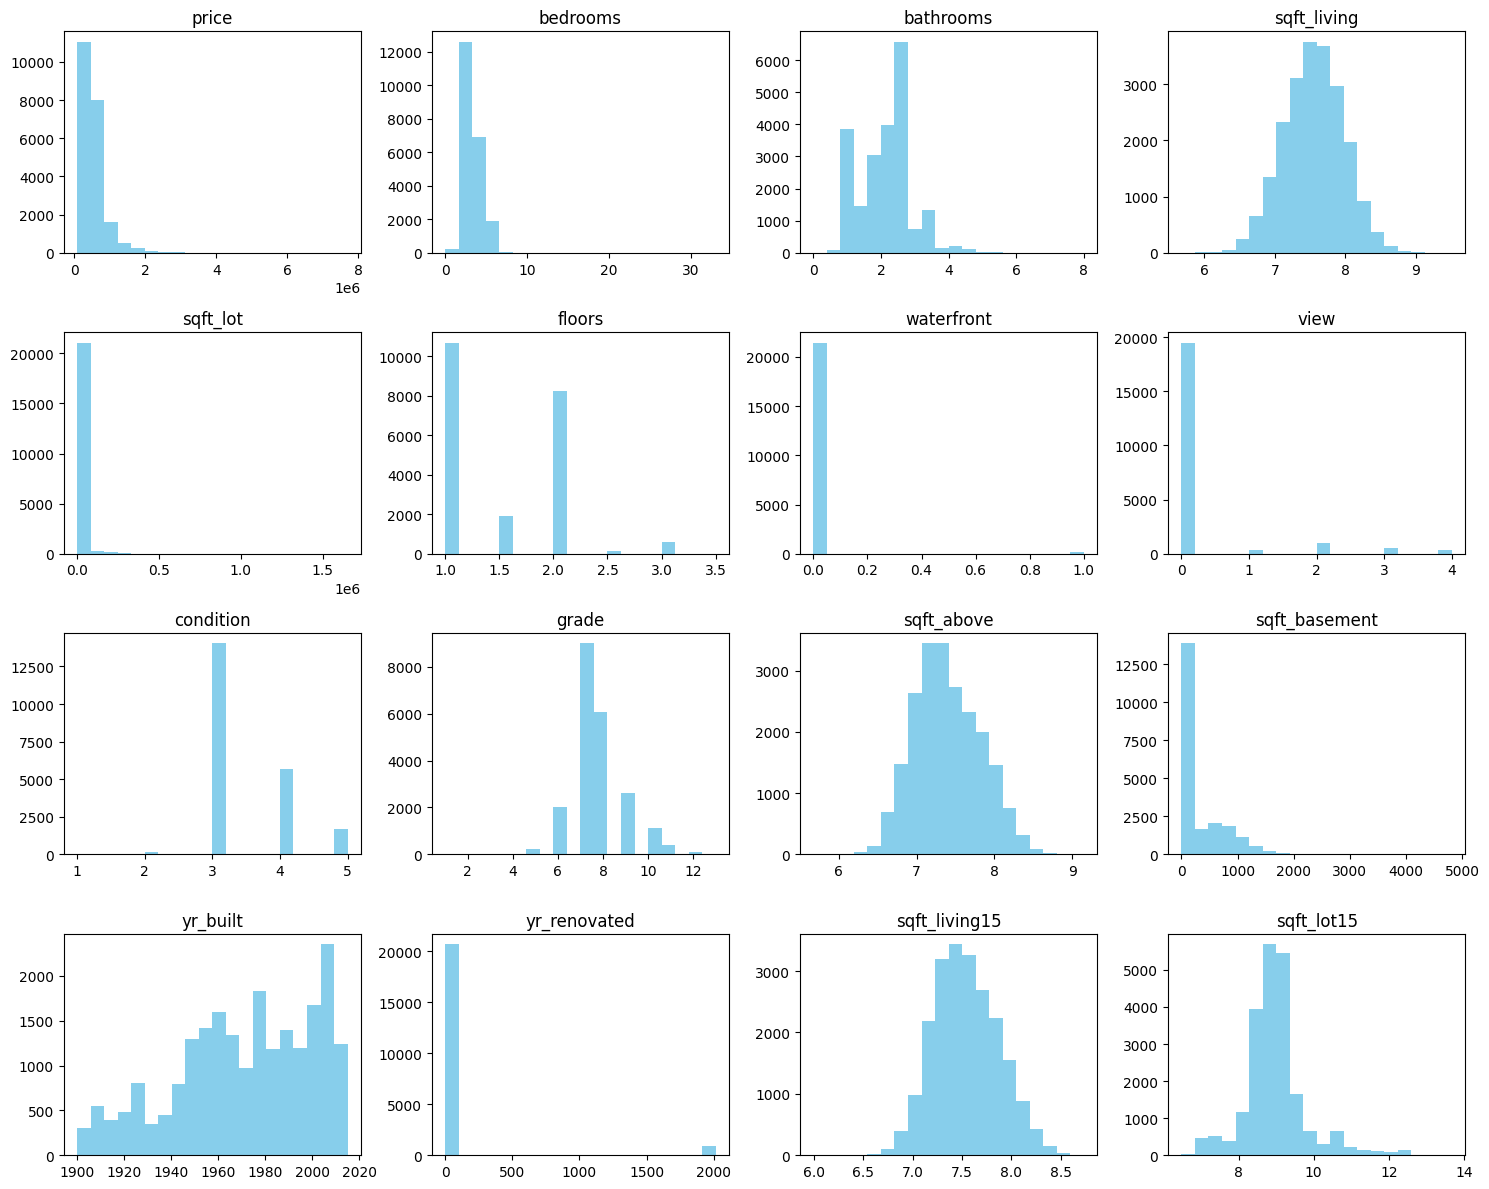

In [12]:
fig, axs = plt.subplots(4, 4, figsize=(15, 12))
axs = axs.ravel()


for i, column in enumerate(logged_data.columns):
    axs[i].hist(logged_data[column], bins=20, color='skyblue')
    axs[i].set_title(column)

plt.tight_layout()
plt.show()

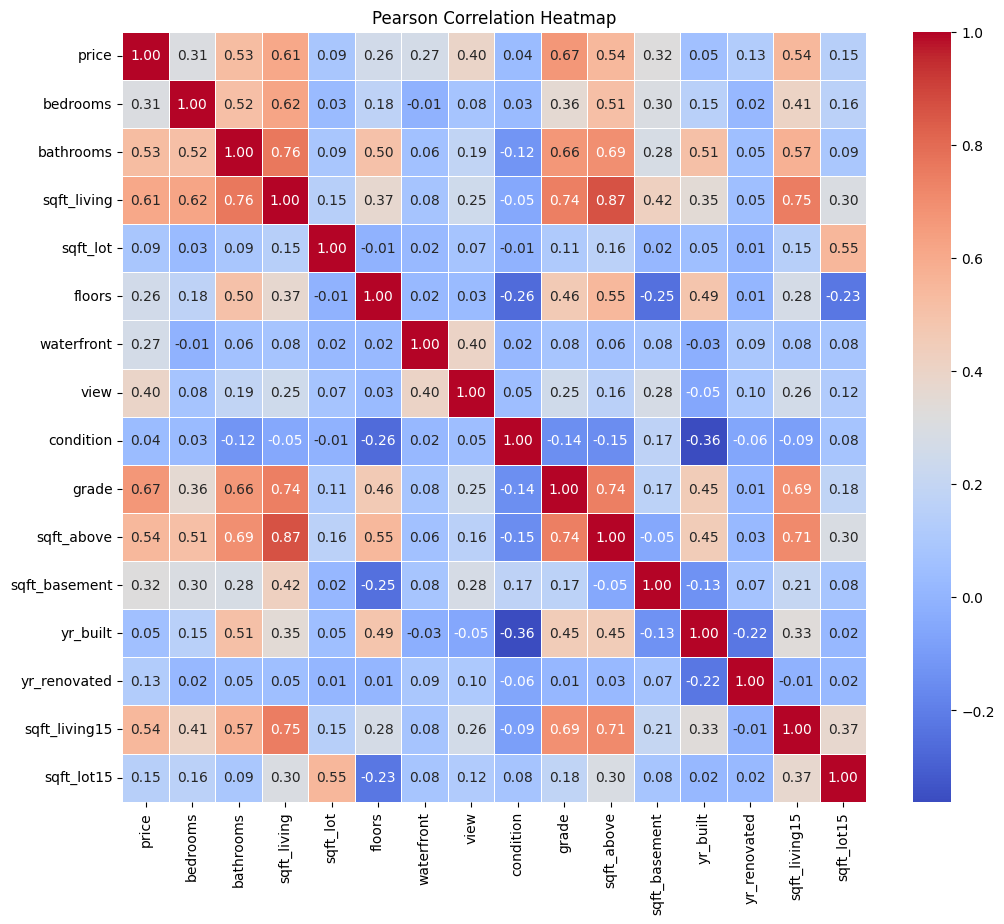

In [13]:
correlation_matrix2 = logged_data.corr(method='pearson')

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

подумать может удалить sqft какой то тк сильная кореляция хоть это и супер логично


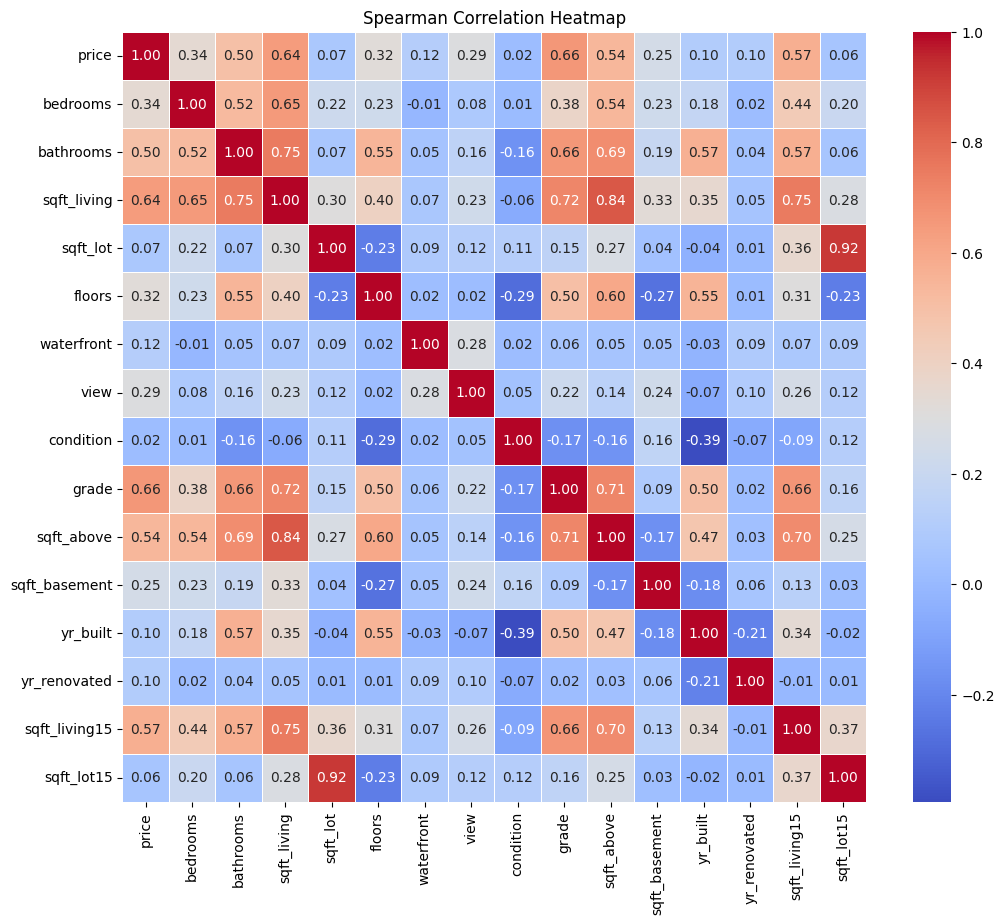

In [14]:
correlation_matrix1 = logged_data.corr(method='spearman')

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Spearman Correlation Heatmap')
plt.show()

Ладно тут в принципе очевычем удалять sqft living у него что спирмена что пирсона высокая 

In [15]:
feature_stats = logged_data['sqft_lot'].describe()
print(feature_stats)

count    2.161300e+04
mean     1.510697e+04
std      4.142051e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068800e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64


### Data Processing

отшкалировать, дропнуть лишние которые корелируют в обоиъ датасетах тури тури подумать головой

может быть заменить yr renovated заменить на бинарный  

In [16]:
scaler = StandardScaler()
features_to_scale = ['yr_built', 'sqft_living15','sqft_above','sqft_basement', 'sqft_living', 'sqft_lot']
scaling_features = cleaned_data[features_to_scale]
scaling_features.head()

,yr_built,sqft_living15,sqft_above,sqft_basement,sqft_living,sqft_lot
0,1955,1340,1180,0,1180,5650
1,1951,1690,2170,400,2570,7242
2,1933,2720,770,0,770,10000
3,1965,1360,1050,910,1960,5000
4,1987,1800,1680,0,1680,8080


In [17]:
scaled_features= scaler.fit_transform(scaling_features)
cleaned_data[features_to_scale] = scaled_features

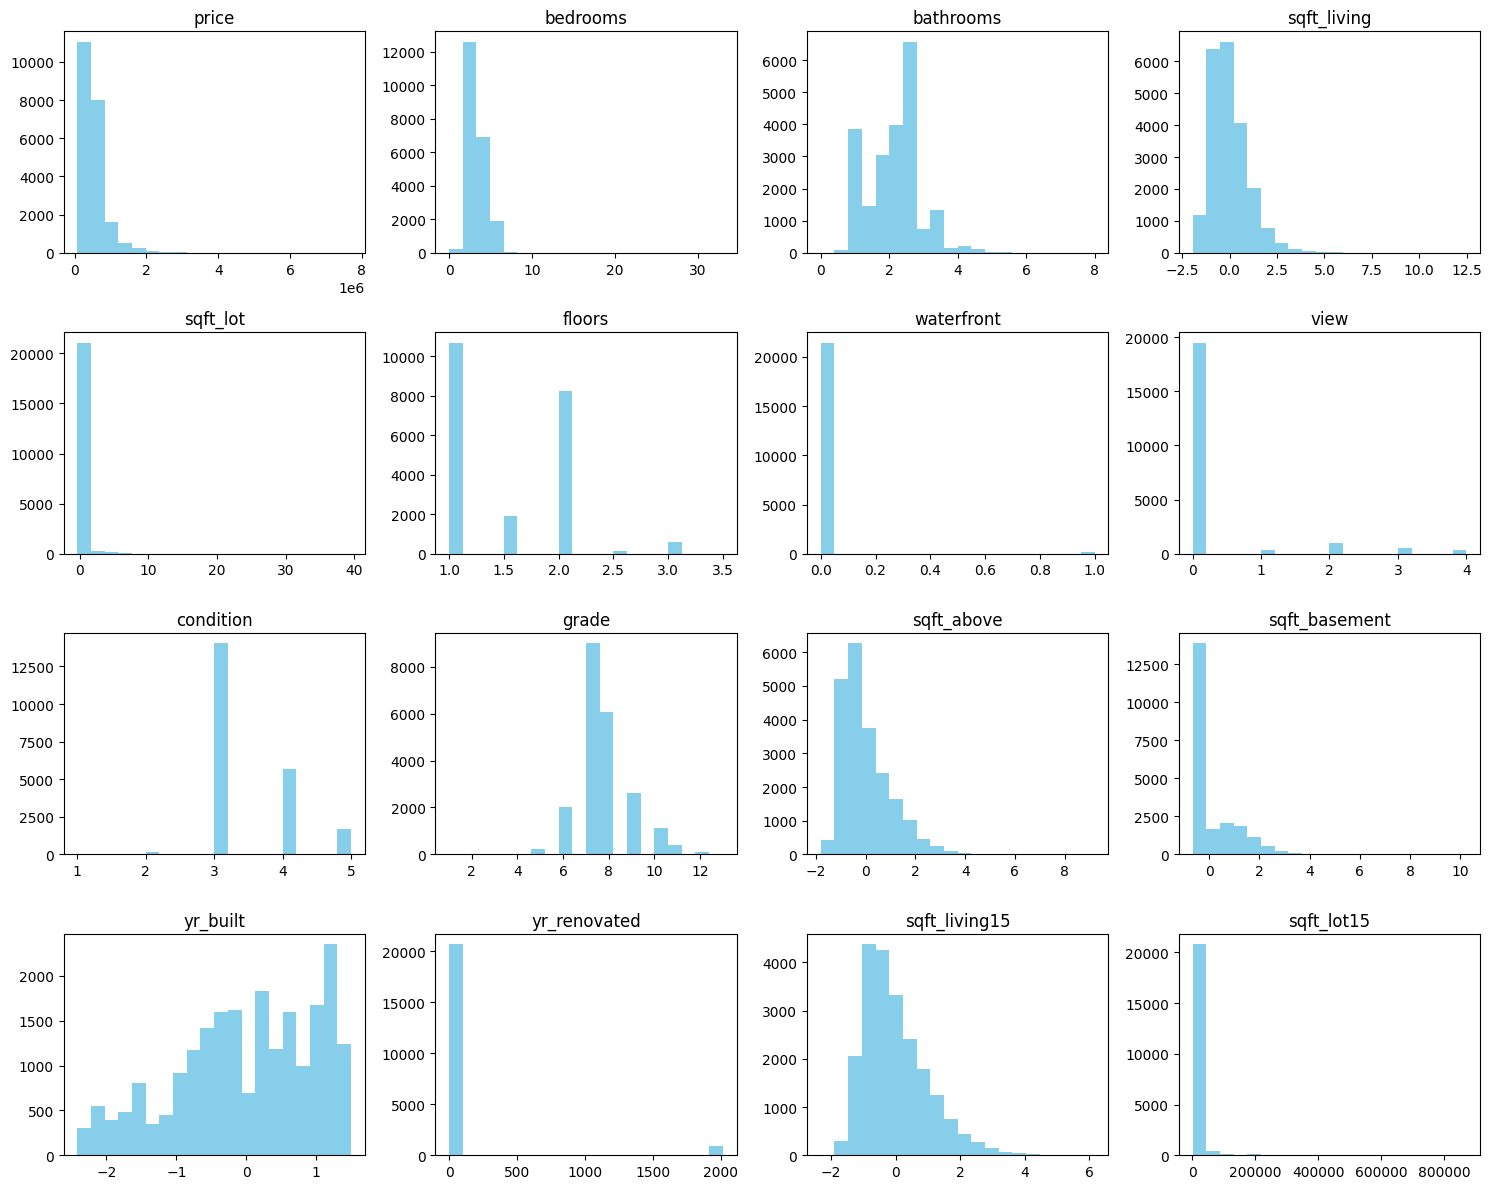

In [18]:
fig, axs = plt.subplots(4, 4, figsize=(15, 12))
axs = axs.ravel()


for i, column in enumerate(cleaned_data.columns):
    axs[i].hist(cleaned_data[column], bins=20, color='skyblue')
    axs[i].set_title(column)

plt.tight_layout()
plt.show()

In [19]:
features_to_scale = ['yr_built', 'sqft_living15','sqft_above','sqft_basement', 'sqft_living', 'sqft_lot', 'sqft_lot15']
scaling_features = logged_data[features_to_scale]
scaling_features.head()

,yr_built,sqft_living15,sqft_above,sqft_basement,sqft_living,sqft_lot,sqft_lot15
0,1955,7.201171,7.074117,0,7.074117,5650,8.639588
1,1951,7.433075,7.682943,400,7.852050,7242,8.941153
2,1933,7.908755,6.647688,0,6.647688,10000,8.995041
3,1965,7.215975,6.957497,910,7.581210,5000,8.517393
4,1987,7.496097,7.427144,0,7.427144,8080,8.923191


In [20]:
scaled_features= scaler.fit_transform(scaling_features)
logged_data[features_to_scale] = scaled_features

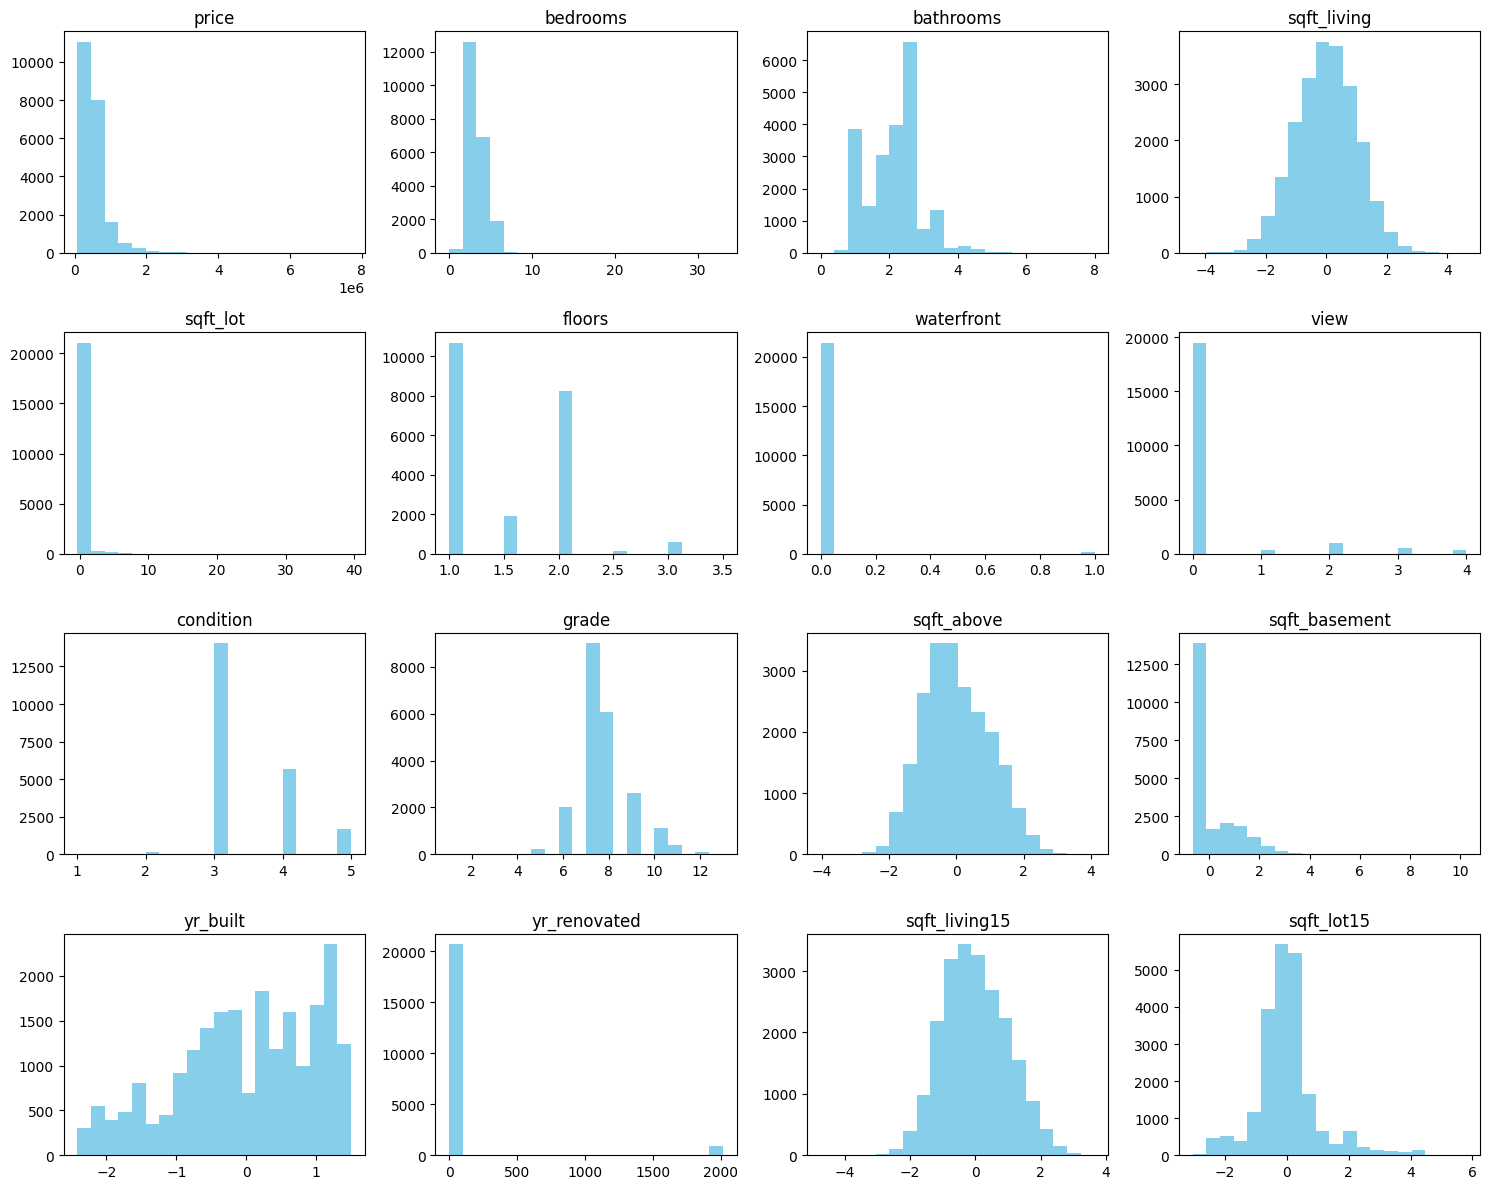

In [21]:
fig, axs = plt.subplots(4, 4, figsize=(15, 12))
axs = axs.ravel()


for i, column in enumerate(logged_data.columns):
    axs[i].hist(logged_data[column], bins=20, color='skyblue')
    axs[i].set_title(column)

plt.tight_layout()
plt.show()

In [22]:
cleaned_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,2.161300e+04,2.161300e+04,21613.000000,2.161300e+04,21613.000000
mean,5.400881e+05,3.370842,2.114757,2.419652e-16,1.052023e-17,1.494309,0.007542,0.234303,3.409430,7.656873,1.104624e-16,6.838148e-17,1.914681e-15,84.402258,8.153176e-17,12768.455652
std,3.671272e+05,0.930062,0.770163,1.000023e+00,1.000023e+00,0.539989,0.086517,0.766318,0.650743,1.175459,1.000023e+00,1.000023e+00,1.000023e+00,401.679240,1.000023e+00,27304.179631
min,7.500000e+04,0.000000,0.000000,-1.948891e+00,-3.521759e-01,1.000000,0.000000,0.000000,1.000000,1.000000,-1.809494e+00,-6.586810e-01,-2.417383e+00,0.000000,-2.316325e+00,651.000000
25%,3.219500e+05,3.000000,1.750000,-7.108948e-01,-2.430487e-01,1.000000,0.000000,0.000000,3.000000,7.000000,-7.226314e-01,-6.586810e-01,-6.810785e-01,0.000000,-7.244971e-01,5100.000000
50%,4.500000e+05,3.000000,2.250000,-1.849914e-01,-1.808075e-01,1.500000,0.000000,0.000000,3.000000,7.000000,-2.758102e-01,-6.586810e-01,1.360059e-01,0.000000,-2.138280e-01,7620.000000
75%,6.450000e+05,4.000000,2.500000,5.118578e-01,-1.066880e-01,2.000000,0.000000,0.000000,4.000000,8.000000,5.091458e-01,6.066704e-01,8.849999e-01,0.000000,5.448802e-01,10083.000000
max,7.700000e+06,33.000000,8.000000,1.247807e+01,3.950434e+01,3.500000,1.000000,4.000000,5.000000,13.000000,9.204044e+00,1.023238e+01,1.497813e+00,2015.000000,6.162239e+00,871200.000000


### Regression


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

базово сначала обучу линейную регрессию на оычных данных, потом обучу регрессию на логарифмированных, если резуьтаты не очень попробую еще сделать бинарным год с момента ремонта и в конце концов PCA,

In [24]:
X = cleaned_data.drop(columns=['price', 'sqft_above'])  # признаки
y = cleaned_data['price']  # целевая переменная

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [25]:
reg = LinearRegression().fit(X_train, y_train)

In [26]:
price_pred = reg.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(price_pred, y_test)
print("Mean Squared Error:", mse)


Mean Squared Error: 52291717658.99702


In [28]:
print(price_pred)

[ 526522.5273049   685643.81861116 1226282.27358494 ...  506229.38589451
  561670.60524684  523060.98416833]


In [29]:

rmse = np.sqrt(mean_squared_error(price_pred, y_test))
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 228673.82372933946


In [30]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(price_pred, y_test)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 143187.80429159987


In [31]:
from sklearn.metrics import r2_score

r2 = r2_score(price_pred, y_test)
print("R-squared (R^2) score:", r2)

R-squared (R^2) score: 0.452749644040653


### Regression with logged

In [32]:
X_l = logged_data.drop(columns=['price'])  # признаки
y_l = logged_data['price']  # целевая переменная

# Разделение данных на обучающую и тестовую выборки
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_l, y_l, test_size=0.20, random_state=42)


In [33]:
reg = LinearRegression().fit(X_train_l, y_train_l)

In [34]:
price_pred_l = reg.predict(X_test_l)

In [35]:
mse = mean_squared_error(price_pred_l, y_test_l)
print("Mean Squared Error:", mse)


Mean Squared Error: 54756564956.091576


In [36]:
rmse = np.sqrt(mean_squared_error(price_pred_l, y_test_l))
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 234001.20716802205


In [37]:
mae = mean_absolute_error(price_pred_l, y_test_l)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 145124.05579260818


In [38]:
r2 = r2_score(price_pred_l, y_test_l)
print("R-squared (R^2) score:", r2)

R-squared (R^2) score: 0.42004535477943583
